In [1]:
!unzip mnist.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: mnist/train/5/2413.png  
  inflating: mnist/train/5/2445.png  
  inflating: mnist/train/5/2452.png  
  inflating: mnist/train/5/2460.png  
  inflating: mnist/train/5/2476.png  
  inflating: mnist/train/5/2487.png  
  inflating: mnist/train/5/2515.png  
  inflating: mnist/train/5/2518.png  
  inflating: mnist/train/5/2525.png  
  inflating: mnist/train/5/2526.png  
  inflating: mnist/train/5/2540.png  
  inflating: mnist/train/5/2545.png  
  inflating: mnist/train/5/2546.png  
  inflating: mnist/train/5/2554.png  
  inflating: mnist/train/5/2556.png  
  inflating: mnist/train/5/2558.png  
  inflating: mnist/train/5/2559.png  
  inflating: mnist/train/5/2569.png  
  inflating: mnist/train/5/2573.png  
  inflating: mnist/train/5/2574.png  
  inflating: mnist/train/5/2581.png  
  inflating: mnist/train/5/2586.png  
  inflating: mnist/train/5/2597.png  
  inflating: mnist/train/5/2604.png  
  inflating: mnist/train/5/

In [2]:
from glob import glob

train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')

train_files[0]

'./mnist/train/0/3565.png'

In [88]:
import numpy as np

np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

len(train_files), len(valid_files), len(test_files)

(6000, 2000, 992)

In [89]:
from PIL import Image

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(Image.open(train_file)))

N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
  Y_valid.append( int(valid_file.split('/')[3]) )
  X_valid.append( np.array(Image.open(valid_file)) )


N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append( np.array(Image.open(test_file)) )

In [90]:
#--- Visualizamos el tamaño de cada subset
len(X_train), len(X_valid), len(X_test)


(6000, 2000, 992)

#10%


In [91]:
len(X_train)

6000

In [92]:
from random import sample
lista = sample(range(0,5999),k=600)
X_train10 = []
Y_train10 = []

for i in lista:
  X_train10.append(X_train[i])
  Y_train10.append(Y_train[i])


In [93]:
len(X_train10)

600

In [94]:
#--- Convertimos las listas de datos a tensores de torch
import torch
from torch.autograd import Variable

X_train10 = Variable(torch.from_numpy(np.array(X_train10))).float()
Y_train10 = Variable(torch.from_numpy(np.array(Y_train10))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train10.data.size()

torch.Size([600, 28, 28])

In [95]:

#--- Definimos una ANN con 4 capas ocultas lineales de 50 neuronas

input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [96]:

from sklearn.metrics import f1_score 

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train10.view(X_train10.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train10)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train10,Y_pred, average='macro') )
  
  acc = sum(Y_train10 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 11.632673263549805. f1:0.04519741657849075 acc: 0.09166666865348816 
Epoch [2/100], loss: 7.855037212371826. f1:0.08942833552780685 acc: 0.1599999964237213 
Epoch [3/100], loss: 5.06791877746582. f1:0.1927668856842691 acc: 0.2666666805744171 
Epoch [4/100], loss: 3.4300460815429688. f1:0.2638902918364817 acc: 0.3400000035762787 
Epoch [5/100], loss: 2.535550355911255. f1:0.37585820493584965 acc: 0.42500001192092896 
Epoch [6/100], loss: 2.178873062133789. f1:0.41004334568371564 acc: 0.43666666746139526 
Epoch [7/100], loss: 1.7526395320892334. f1:0.4661938463642361 acc: 0.47833332419395447 
Epoch [8/100], loss: 1.3481446504592896. f1:0.5685988485314508 acc: 0.57833331823349 
Epoch [9/100], loss: 1.1209558248519897. f1:0.6158662560038477 acc: 0.6200000047683716 
Epoch [10/100], loss: 1.0181549787521362. f1:0.6566157522941298 acc: 0.6616666913032532 
Epoch [11/100], loss: 0.9445108771324158. f1:0.6854954645943834 acc: 0.6899999976158142 
Epoch [12/100], loss: 0.85420

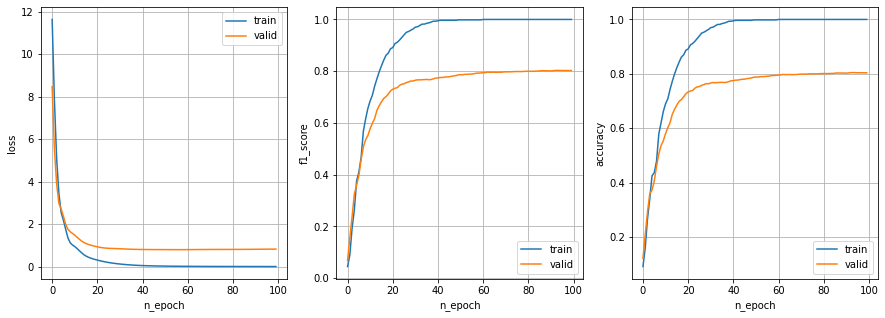

In [97]:
#-- Visualizamos las curvas de entrenamiento y validación
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [98]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.7230397462844849, f1: 0.8250479654038403, acc: 0.8276209831237793


#20%


In [99]:
lista = sample(range(0,5999),k=1200)
X_train20 = []
Y_train20 = []

for i in lista:
  X_train20.append(X_train[i])
  Y_train20.append(Y_train[i])


In [100]:
X_train20 = Variable(torch.from_numpy(np.array(X_train20))).float()
Y_train20 = Variable(torch.from_numpy(np.array(Y_train20))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train20.data.size()

torch.Size([1200, 28, 28])

In [101]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [102]:
#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train20.view(X_train20.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train20)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train20,Y_pred, average='macro') )
  
  acc = sum(Y_train20 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 16.693838119506836. f1:0.02692812818649405 acc: 0.0833333358168602 
Epoch [2/100], loss: 8.652416229248047. f1:0.1102977056691101 acc: 0.1550000011920929 
Epoch [3/100], loss: 6.031872272491455. f1:0.17261804678457593 acc: 0.22833333909511566 
Epoch [4/100], loss: 5.032462120056152. f1:0.20198271643732252 acc: 0.24916666746139526 
Epoch [5/100], loss: 3.7506766319274902. f1:0.2886874506452824 acc: 0.3125 
Epoch [6/100], loss: 2.8444478511810303. f1:0.3843249632787561 acc: 0.38333332538604736 
Epoch [7/100], loss: 2.3955085277557373. f1:0.4419559313672775 acc: 0.4358333349227905 
Epoch [8/100], loss: 2.0515148639678955. f1:0.5058641979496199 acc: 0.5066666603088379 
Epoch [9/100], loss: 1.8242751359939575. f1:0.5420511531529776 acc: 0.5483333468437195 
Epoch [10/100], loss: 1.6469041109085083. f1:0.5667113447695686 acc: 0.5791666507720947 
Epoch [11/100], loss: 1.4654291868209839. f1:0.6068877834320935 acc: 0.6191666722297668 
Epoch [12/100], loss: 1.276996016502380

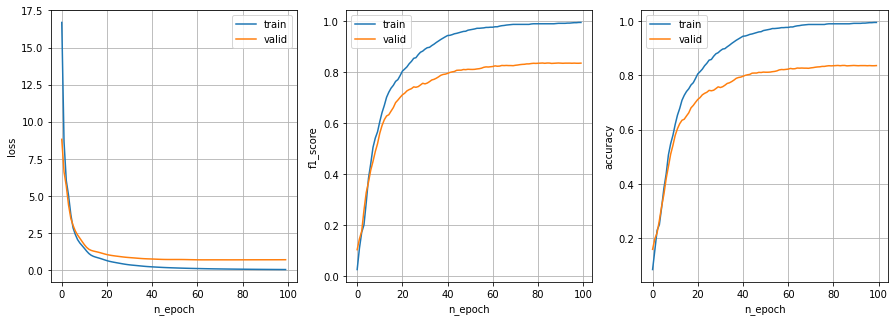

In [103]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [104]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.5398668050765991, f1: 0.8542239559182973, acc: 0.8558467626571655


#50%

In [105]:
lista = sample(range(0,5999),k=3000)
X_train50 = []
Y_train50 = []

for i in lista:
  X_train50.append(X_train[i])
  Y_train50.append(Y_train[i])

In [106]:
X_train50 = Variable(torch.from_numpy(np.array(X_train50))).float()
Y_train50 = Variable(torch.from_numpy(np.array(Y_train50))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train50.data.size()

torch.Size([3000, 28, 28])

In [107]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [108]:
#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train50.view(X_train50.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train50)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train50,Y_pred, average='macro') )
  
  acc = sum(Y_train50 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 10.783488273620605. f1:0.05444771827531227 acc: 0.09533333033323288 
Epoch [2/100], loss: 6.277484893798828. f1:0.12537974171454133 acc: 0.1456666737794876 
Epoch [3/100], loss: 4.621818542480469. f1:0.19986298842912414 acc: 0.2383333295583725 
Epoch [4/100], loss: 3.6009860038757324. f1:0.280768875394673 acc: 0.3283333480358124 
Epoch [5/100], loss: 3.04591703414917. f1:0.35162227157551335 acc: 0.38466668128967285 
Epoch [6/100], loss: 2.474442958831787. f1:0.39698542199771764 acc: 0.4259999990463257 
Epoch [7/100], loss: 2.0976483821868896. f1:0.4508860620266352 acc: 0.46933332085609436 
Epoch [8/100], loss: 1.8024533987045288. f1:0.49127099427920057 acc: 0.5053333044052124 
Epoch [9/100], loss: 1.51848566532135. f1:0.549011202795815 acc: 0.5556666851043701 
Epoch [10/100], loss: 1.2995247840881348. f1:0.6119116578926936 acc: 0.6166666746139526 
Epoch [11/100], loss: 1.1440989971160889. f1:0.6435433152455869 acc: 0.6486666798591614 
Epoch [12/100], loss: 1.023792

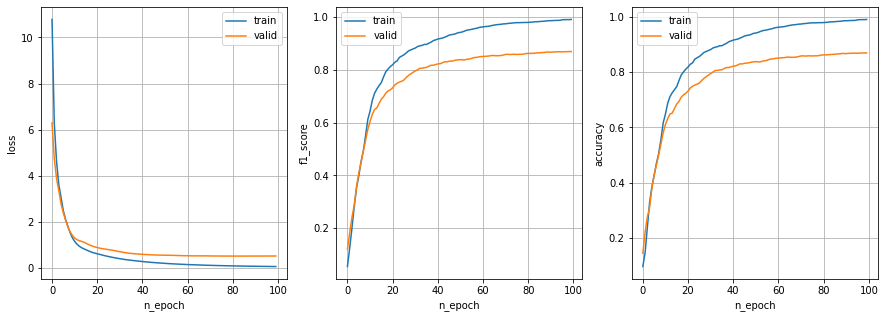

In [109]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [110]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.42130130529403687, f1: 0.8818366773937576, acc: 0.882056474685669


#80%


In [111]:
lista = sample(range(0,5999),k=4800)
X_train80 = []
Y_train80 = []

for i in lista:
  X_train80.append(X_train[i])
  Y_train80.append(Y_train[i])

In [112]:
X_train80 = Variable(torch.from_numpy(np.array(X_train80))).float()
Y_train80 = Variable(torch.from_numpy(np.array(Y_train80))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train80.data.size()

torch.Size([4800, 28, 28])

In [113]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [114]:
#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train80.view(X_train80.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train80)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train80,Y_pred, average='macro') )
  
  acc = sum(Y_train80 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 17.423988342285156. f1:0.02909286020470741 acc: 0.07187499850988388 
Epoch [2/100], loss: 9.157970428466797. f1:0.08241898584800747 acc: 0.14104166626930237 
Epoch [3/100], loss: 6.145186901092529. f1:0.15544985370367087 acc: 0.19479165971279144 
Epoch [4/100], loss: 4.826292514801025. f1:0.2048233182605061 acc: 0.2331250011920929 
Epoch [5/100], loss: 3.6470844745635986. f1:0.2558361942312969 acc: 0.28062498569488525 
Epoch [6/100], loss: 3.070798397064209. f1:0.3086033417876167 acc: 0.3264583349227905 
Epoch [7/100], loss: 2.5938923358917236. f1:0.37819986659657473 acc: 0.3866666555404663 
Epoch [8/100], loss: 2.1694679260253906. f1:0.4532716691794641 acc: 0.4579166769981384 
Epoch [9/100], loss: 1.8416168689727783. f1:0.5171063097913817 acc: 0.5206249952316284 
Epoch [10/100], loss: 1.60275399684906. f1:0.5600664098576149 acc: 0.5616666674613953 
Epoch [11/100], loss: 1.42759370803833. f1:0.5909605498211812 acc: 0.590624988079071 
Epoch [12/100], loss: 1.3065563

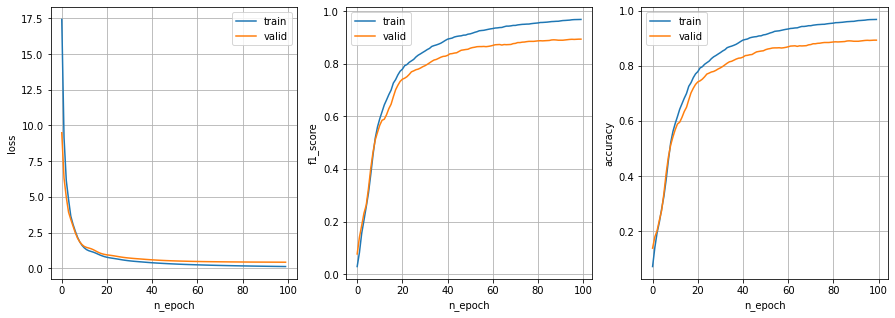

In [115]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [116]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.3696303069591522, f1: 0.8950989639294619, acc: 0.8951612710952759


#100%

In [117]:
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [118]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [119]:
#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train.view(X_train.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
  acc = sum(Y_train == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 11.293912887573242. f1:0.06887192503570336 acc: 0.12266666442155838 
Epoch [2/100], loss: 7.185497283935547. f1:0.08744111937237521 acc: 0.11900000274181366 
Epoch [3/100], loss: 4.867361545562744. f1:0.13622079581369942 acc: 0.16200000047683716 
Epoch [4/100], loss: 3.4080326557159424. f1:0.2287219725828265 acc: 0.24699999392032623 
Epoch [5/100], loss: 2.5198705196380615. f1:0.34714683877539027 acc: 0.3531666696071625 
Epoch [6/100], loss: 1.9913700819015503. f1:0.4384947794166997 acc: 0.44699999690055847 
Epoch [7/100], loss: 1.6704494953155518. f1:0.49875981909910994 acc: 0.5095000267028809 
Epoch [8/100], loss: 1.4603185653686523. f1:0.5553568709880118 acc: 0.562833309173584 
Epoch [9/100], loss: 1.2927637100219727. f1:0.6079344437697694 acc: 0.6111666560173035 
Epoch [10/100], loss: 1.164088487625122. f1:0.6507310155563678 acc: 0.6524999737739563 
Epoch [11/100], loss: 1.071820855140686. f1:0.6852599563334578 acc: 0.6851666569709778 
Epoch [12/100], loss: 0.9

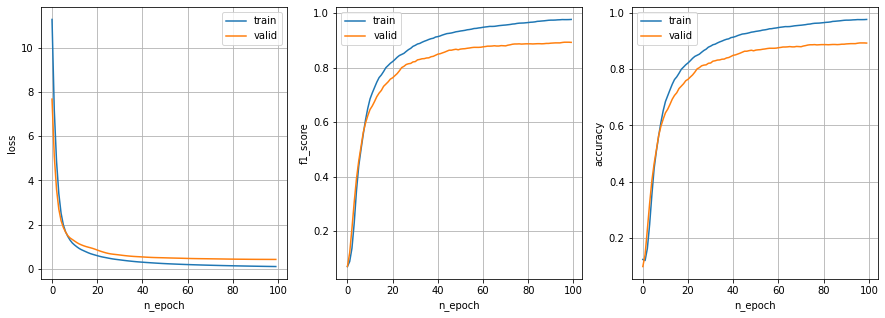

In [120]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()


In [121]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.37516140937805176, f1: 0.9014311546381247, acc: 0.9022177457809448


#Comentarios: El conjunto de entrenamiento es de alta importancia dado que como se observó en este ejercicio a medida que se aumentaba el tamaño del conjunto el modelo aprendía de mejor manera como clasificar los datos, este conjunto es probablemente el más importante ya que sin este el programa no podría aprender. Además, a medida que se aumentaba el porcentaje la curva de validación se acercaba más a la de entrenamiento, esto quiere decir que el modelo cada vez estaba mejor entrenado para clasificar datos.

#Parte 2 


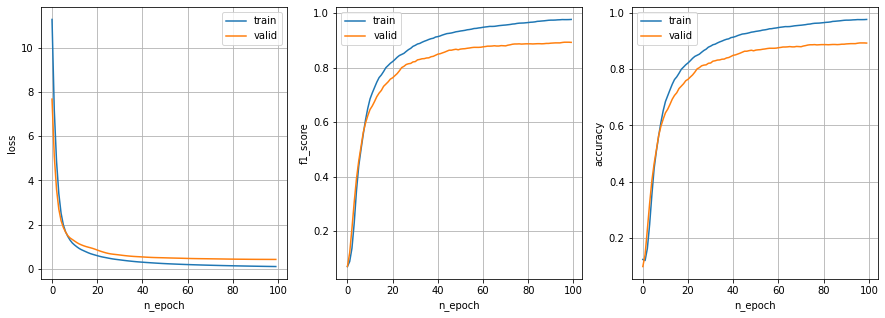

In [122]:
#-- Usamos ultimo modelo entrenado con 100% de datos de entrenamiento y validacion
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()


In [150]:
#reiniciamos los conjuntos de testeo(que vuelvan a ser listas)
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append( np.array(Image.open(test_file)) )

In [151]:
a = np.int(len(X_test)*0.1)
lista = sample(range(0,991),k=a)
X_test10 = []
Y_test10 = []

for i in lista:
  X_test10.append(X_test[i])
  Y_test10.append(Y_test[i])

In [152]:
X_test10 = Variable(torch.from_numpy(np.array(X_test10))).float()
Y_test10 = Variable(torch.from_numpy(np.array(Y_test10))).long()

In [153]:
model.eval()

Xts = X_test10.view(X_test10.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test10)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test10, Y_pred, average='macro')

acc = sum(Y_test10 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.29815617203712463, f1: 0.9221672362724995, acc: 0.9191918969154358


In [154]:
a = np.int(len(X_test)*0.2)
lista = sample(range(0,991),k=a)
X_test20 = []
Y_test20 = []

for i in lista:
  X_test20.append(X_test[i])
  Y_test20.append(Y_test[i])

In [155]:
X_test20 = Variable(torch.from_numpy(np.array(X_test20))).float()
Y_test20 = Variable(torch.from_numpy(np.array(Y_test20))).long()

In [156]:
model.eval()

Xts = X_test20.view(X_test20.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test20)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test20, Y_pred, average='macro')

acc = sum(Y_test20 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.336309015750885, f1: 0.9182820469004678, acc: 0.9191918969154358


In [157]:
a = np.int(len(X_test)*0.5)
lista = sample(range(0,991),k=a)
X_test50 = []
Y_test50 = []

for i in lista:
  X_test50.append(X_test[i])
  Y_test50.append(Y_test[i])

In [158]:
X_test50 = Variable(torch.from_numpy(np.array(X_test50))).float()
Y_test50 = Variable(torch.from_numpy(np.array(Y_test50))).long()

In [159]:
model.eval()

Xts = X_test50.view(X_test50.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test50)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test50, Y_pred, average='macro')

acc = sum(Y_test50 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.3686656057834625, f1: 0.8922243185951102, acc: 0.8931451439857483


In [160]:
a = np.int(len(X_test)*0.8)
lista = sample(range(0,991),k=a)
X_test80 = []
Y_test80 = []

for i in lista:
  X_test80.append(X_test[i])
  Y_test80.append(Y_test[i])

In [161]:
X_test80 = Variable(torch.from_numpy(np.array(X_test80))).float()
Y_test80 = Variable(torch.from_numpy(np.array(Y_test80))).long()

In [162]:
model.eval()

Xts = X_test80.view(X_test80.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test80)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test80, Y_pred, average='macro')

acc = sum(Y_test80 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.36743417382240295, f1: 0.9030196073752572, acc: 0.9041613936424255


In [163]:
X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

In [164]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.37516140937805176, f1: 0.9014311546381247, acc: 0.9022177457809448


#Comentarios: El conjunto de testeo es bastante importante ya que nos permite saber que tan bien aprendió nuestro modelo, en este caso a medida que aumenta el número de datos de testeo los tres scores tienden a ser peores y aunque esto pueda parecer algo malo en realidad es muy bueno ya que si se toma un set de datos muy pequeño se podría sobreestimar o subestimar la eficiencia del modelo ya que hay menos posibilidades de que los datos estén bien balanceados, por ello es importante que este conjunto sea lo suficientemente grande.